In [2]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read loan.csv file from 
loan=pd.read_csv("/Users/shekher.r/upgrade/python/Juune-ML53/Lending_club_case_study/ravi/loan.csv")

In [4]:
## taking some insights of records
loan.head()
loan.shape
loan.info(verbose=True, show_counts=True)
loan.loan_status.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [5]:
## filtering out records which are Fully Paid or Charged Off as we cant say anything about loan which are currently running
loan_redord_anyls=loan[(loan.loan_status=='Fully Paid')|(loan.loan_status=='Charged Off')]

In [6]:
## comparing shapes of records after removing Current loan status records
print(loan.shape)
print(loan_redord_anyls.shape)

(39717, 111)
(38577, 111)


In [7]:
#loan_redord_anyls.info(verbose=True, show_counts=True)
#Remove columns that have 90% null values
drop_columns=loan_redord_anyls.columns[(loan_redord_anyls.isnull().sum()/len(loan_redord_anyls.index))>.9]
loan_redord_anyls_1=loan_redord_anyls.drop(drop_columns,axis=1)
print(loan_redord_anyls_1.isnull().sum())
#loan_redord_anyls_1.info()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [8]:
## remove columns id,member_id,desc
loan_redord_anyls_1.head(2)
loan_redord_anyls_2=loan_redord_anyls_1.drop(["id","member_id","desc"],axis=1)
print(loan.shape)
print(loan_redord_anyls_2.shape)


(39717, 111)
(38577, 52)


In [9]:
## remove records that have more than 5 columns missing
pd.set_option('display.max_columns', None)
loan_redord_anyls_3=loan_redord_anyls_2[~(loan_redord_anyls_2.isnull().sum(axis=1)>5)]
#loan_redord_anyls_3.info()

In [10]:
## change data type of column term,
#loan_redord_anyls_3['term'].head()
loan_redord_anyls_3['term']=loan_redord_anyls_3['term'].apply(lambda x:int(str(x).replace(' months','')))
loan_redord_anyls_3['int_rate']=loan_redord_anyls_3['int_rate'].apply(lambda x: x if type(x)==int else float(str(x).replace('%','')))
loan_redord_anyls_3['revol_util']=loan_redord_anyls_3['revol_util'].apply(lambda x: x if type(x)==int else float(str(x).replace('%','')))
## clean employee length 
#emp_length
loan_redord_anyls4=loan_redord_anyls_3[~(loan_redord_anyls_3['emp_length'].isnull())]
loan_redord_anyls4['emp_length']=loan_redord_anyls4['emp_length'].apply(lambda x: re.findall('\d+',str(x))[0])
loan_redord_anyls4['emp_length']=loan_redord_anyls4['emp_length'].apply(lambda x:pd.to_numeric(x))
loan_redord_anyls4['issue_d_month']=pd.to_datetime(loan_redord_anyls4['issue_d'],format='%b-%y').dt.month
loan_redord_anyls4['issue_d_year']=pd.to_datetime(loan_redord_anyls4['issue_d'],format='%b-%y').dt.year

In [11]:
##bucketing columns
#for loan_amnt max=35000 and min=500 , annual_inc min=4000.0 max=6000000.0 int_rate max= 24.4 and min=5.42

def loan_amnt_bucket(x):
    if(x<5000):
        return '0-5k'
    elif(x>=5000 & x<10000):
        return '5k-10k'
    elif(x>=10000 & x<15000):
        return '10k-15k'
    elif(x>=15000 & x<20000):
        return '15k-20k'
    elif(x>=20000 & x<25000):
        return '20k-25k'
    elif(x>=25000 & x<30000):
        return '25k-30k'
    elif(x>=25000 & x<30000):
        return '25k-30k'
    elif(x>=30000 & x<35000):
        return '30k-35k'
    elif(x>=35000):
        return '35k+'
 
def annual_inc_bucket(x):
    if(x<20000):
        return '0-20k'
    elif(x>=20000 and x<40000):
        return '20k-40k'
    elif(x>=40000 and x<60000):
        return '40k-60k'
    elif(x>=60000 and x<80000):
        return '60k-80k'
    elif(x>80000 and x<100000):
        return '80k-100k'
    elif(x>=100000):
        return '100k+'
def int_rate_bucket(x):
    if(x<5):
        return '0-5'
    if(x>=5 and x<10):
        return '5-10'
    if(x>=10 and x<15):
        return '10-15'
    if(x>=15 and x<20):
        return '15-20'
    if(x>=20 and x<25):
        return '20-25'
    
    

loan_redord_anyls4['loan_amnt_bucket']= loan_redord_anyls4['loan_amnt'].apply(lambda x:loan_amnt_bucket(x))   
loan_redord_anyls4['annual_inc_bucket']=loan_redord_anyls4['annual_inc'].apply(lambda x:annual_inc_bucket(x))
loan_redord_anyls4['int_rate_bucket']=loan_redord_anyls4['int_rate'].apply(lambda x:int_rate_bucket(x))

Fully Paid     85.618774
Charged Off    14.381226
Name: loan_status, dtype: float64


<AxesSubplot:>

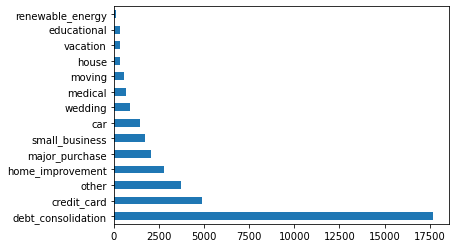

In [12]:
## check percentage of loan Charged Off
print(loan_redord_anyls4['loan_status'].value_counts()*100/len(loan_redord_anyls4['loan_status']))

## most of loan taken for purpose of debt_consolidation
loan_redord_anyls4.purpose.value_counts().plot.barh()


count    37542.000000
mean     11119.741223
std       7354.077697
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
80%      16000.000000
90%      21847.500000
95%      25000.000000
98%      30000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


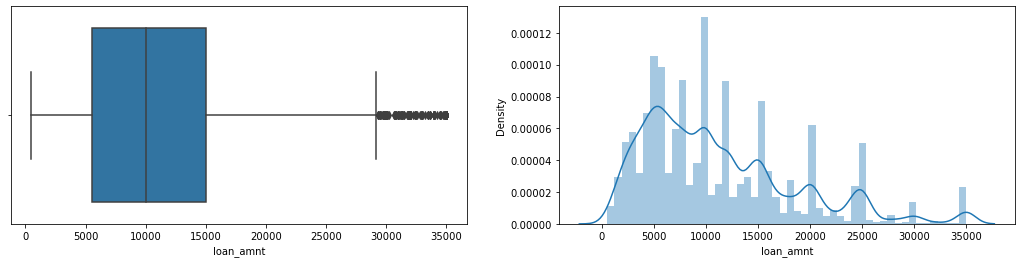

In [13]:
## UNIVARIATE ANALYSIS for loan amount
## observation 90 % data is below 25000.000000 and most of loan_amount is between 5k to 15k

print(loan_redord_anyls4['loan_amnt'].describe(percentiles=[.25,.50,.75,.80,.90,.95,.98]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['loan_amnt'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['loan_amnt'])
plt.show()

count    37542.000000
mean     10853.957568
std       7096.295902
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
80%      16000.000000
90%      20050.000000
95%      25000.000000
98%      30000.000000
max      35000.000000
Name: funded_amnt, dtype: float64


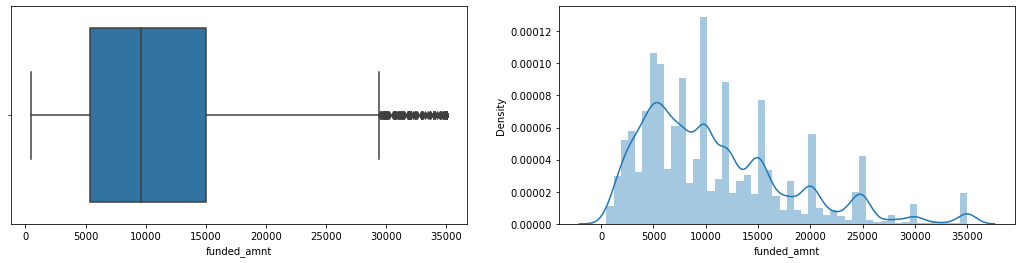

In [14]:
## UNIVARIATE ANALYSIS for funded_amnt
print(loan_redord_anyls4['funded_amnt'].describe(percentiles=[.25,.50,.75,.80,.90,.95,.98]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['funded_amnt'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['funded_amnt'])
plt.show()

count    37542.000000
mean        11.963467
std          3.683052
min          5.420000
25%          8.940000
50%         11.830000
75%         14.420000
80%         15.230000
90%         16.820000
95%         18.390000
max         24.400000
Name: int_rate, dtype: float64


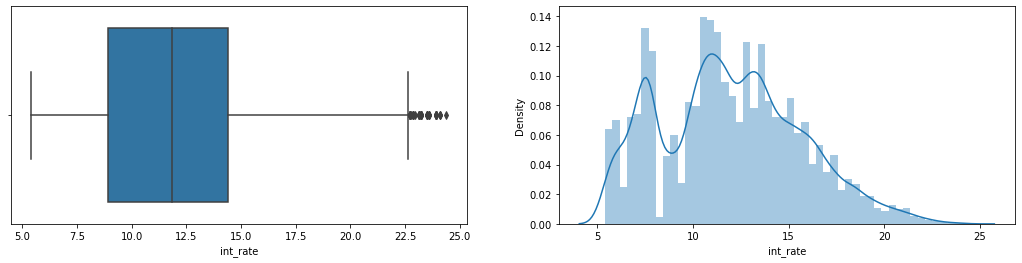

In [15]:
## UNIVARIATE ANALYSIS for int_rate
print(loan_redord_anyls4['int_rate'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['int_rate'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['int_rate'])
plt.show()

count    37542.000000
mean       324.661678
std        208.900613
min         15.690000
25%        167.380000
50%        280.005000
75%        429.007500
80%        483.050000
90%        623.270000
95%        763.829500
max       1305.190000
Name: installment, dtype: float64


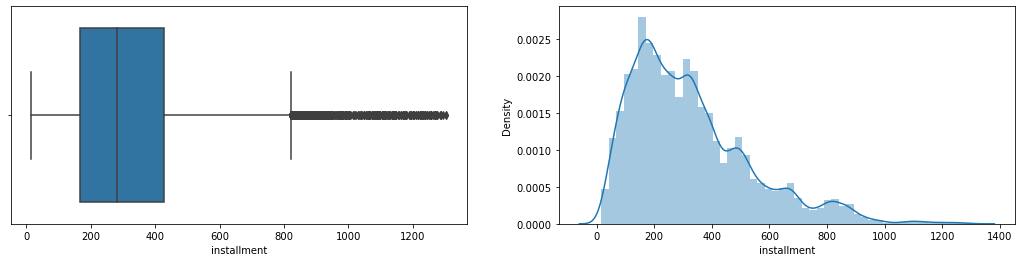

In [16]:
## UNIVARIATE ANALYSIS for installment
print(loan_redord_anyls4['installment'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['installment'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['installment'])
plt.show()

## most of installment amount lies between 167.38 and 429.00 median is 280.005000


(array([11357.,  7669.,     0.,  9660.,     0.,  2620.,   959.,     0.,
         4979.,   298.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

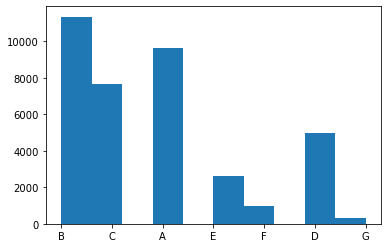

In [17]:
## UNIVARIATE ANALYSIS for grade

plt.hist(loan_redord_anyls4['grade'],bins=10)

#loan_redord_anyls4['grade'].value_counts()
# most of loan given to grade 

count    37542.000000
mean         5.061265
std          3.401712
min          1.000000
25%          2.000000
50%          4.000000
75%          9.000000
80%         10.000000
90%         10.000000
95%         10.000000
max         10.000000
Name: emp_length, dtype: float64


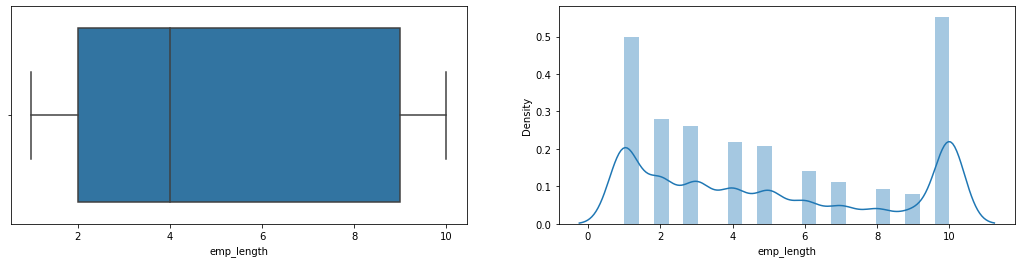

10    22.609344
1     20.443770
2     11.429865
3     10.686698
4      8.902030
5      8.507805
6      5.774865
7      4.557562
8      3.822386
9      3.265676
Name: emp_length, dtype: float64


In [18]:
## UNIVARIATE ANALYSIS for emp_length
print(loan_redord_anyls4['emp_length'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))
## 95 % data is below
#plt.boxplot(loan_redord_anyls4['loan_amnt'])
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['emp_length'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['emp_length'])
plt.show()
print(loan_redord_anyls4['emp_length'].value_counts()/len(loan_redord_anyls4.index)*100)
## observation:- around 22 % data of loan distributed to customer having emp_length 10 or more than 10 yrs
## and 20 % of distribution is of < 1 yrs

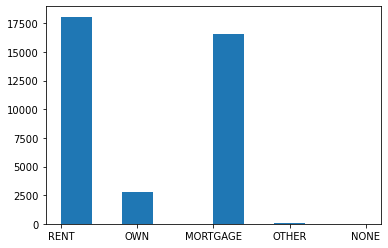

RENT        48.154067
MORTGAGE    44.203825
OWN          7.378403
OTHER        0.261041
NONE         0.002664
Name: home_ownership, dtype: float64


In [19]:
## UNIVARIATE ANALYSIS for home_ownership
plt.hist(loan_redord_anyls4['home_ownership'])
plt.show()
print(loan_redord_anyls4['home_ownership'].value_counts()/len(loan_redord_anyls4.index)*100)
## observation:- around 48 % loan is for rent and 44 % loann is for mortgage


40k-60k     27.715625
60k-80k     22.140536
20k-40k     19.732566
100k+       15.784987
80k-100k    10.577487
0-20k        2.378669
Name: annual_inc_bucket, dtype: float64


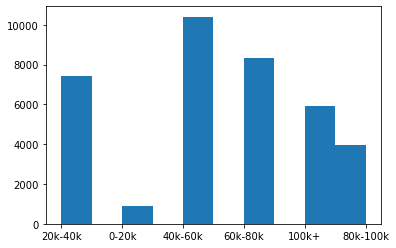

In [20]:
## UNIVARIATE ANALYSIS for annual_inc annual_inc_bucket

loan_redord_anyls5=loan_redord_anyls4[~loan_redord_anyls4['annual_inc_bucket'].isnull()]

print(loan_redord_anyls4['annual_inc_bucket'].value_counts()/len(loan_redord_anyls4.index)*100)
plt.hist(loan_redord_anyls5['annual_inc_bucket'])
plt.show()

## need to reloook this

count    37542.000000
mean        13.284095
std          6.660717
min          0.000000
25%          8.160000
50%         13.380000
75%         18.550000
80%         19.700000
90%         22.290000
95%         23.790000
max         29.990000
Name: dti, dtype: float64


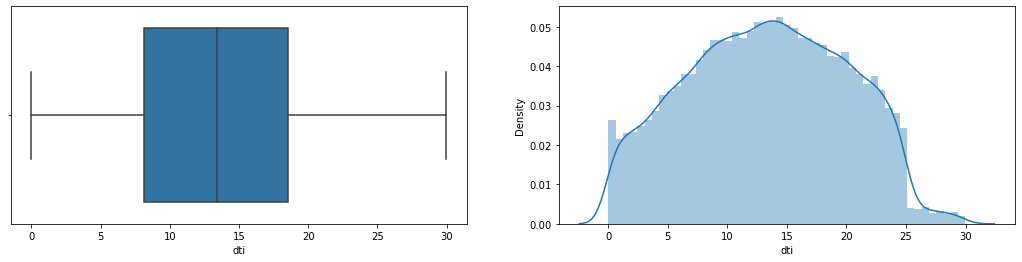

In [21]:
## UNIVARIATE ANALYSIS for dti
print(loan_redord_anyls4['dti'].describe(percentiles=[.25,.50,.75,.80,.90,.95]))
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(loan_redord_anyls4['dti'])
plt.subplot(1,2,2)
sns.distplot(loan_redord_anyls4['dti'])
plt.show()

## observation:-


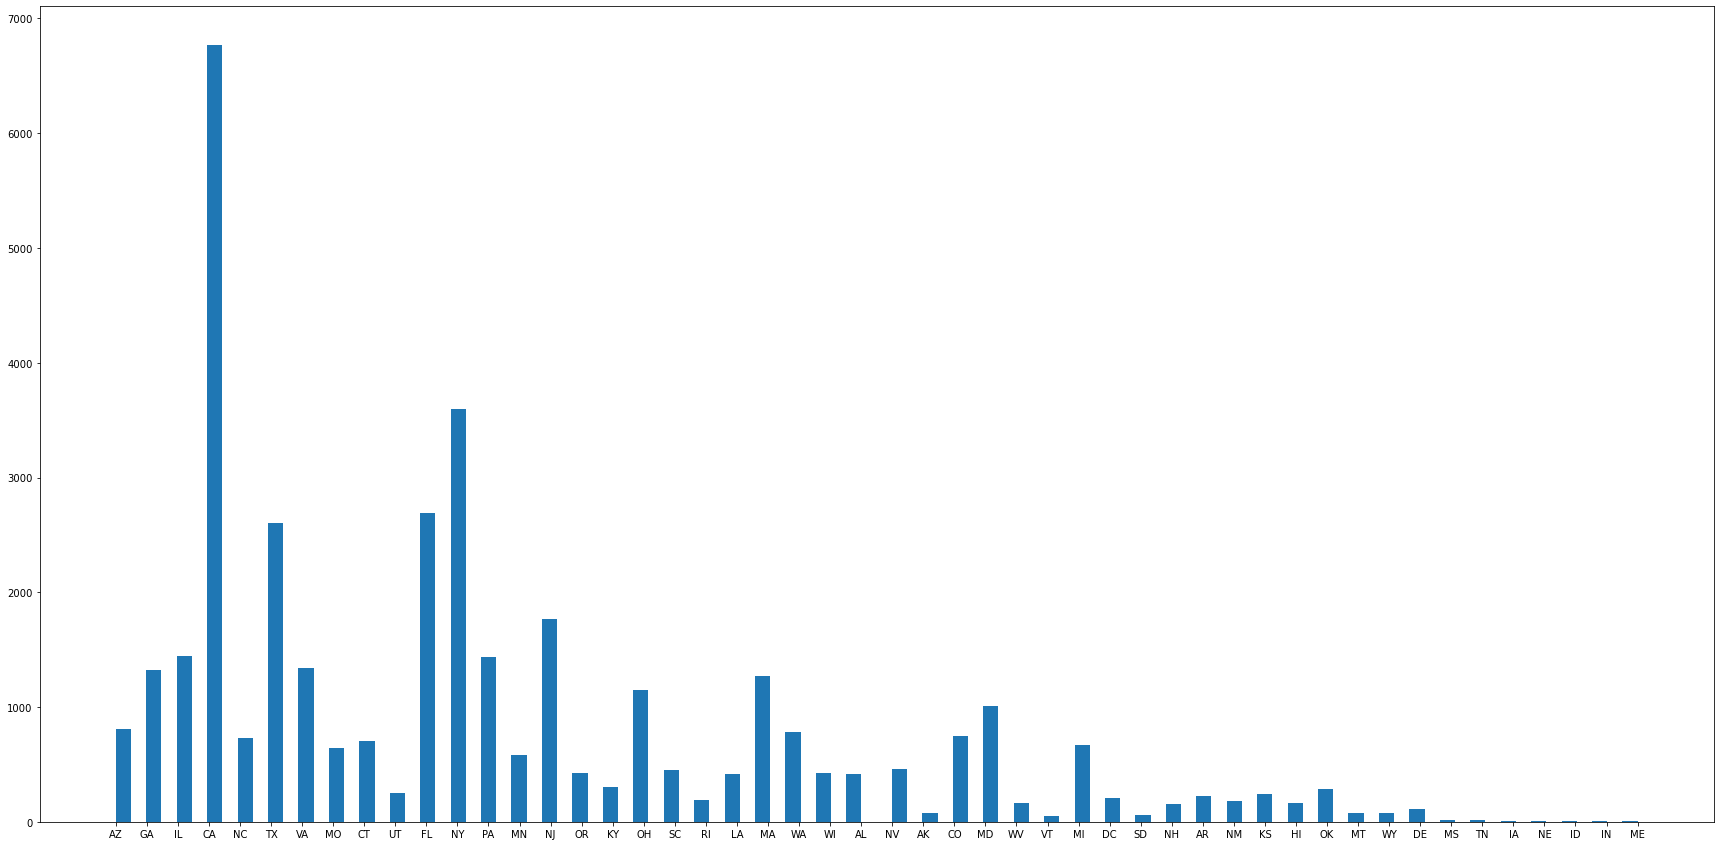

CA    18.025145
NY     9.586596
FL     7.175963
TX     6.938895
NJ     4.709392
Name: addr_state, dtype: float64


In [28]:
## UNIVARIATE ANALYSIS for addr_state
plt.figure(figsize=(30,15))
plt.hist(loan_redord_anyls4['addr_state'],bins=100)
plt.show()
print(loan_redord_anyls4['addr_state'].value_counts().head()/len(loan_redord_anyls4.index)*100)
## observation:- around 18 % loan taken by state of CA 

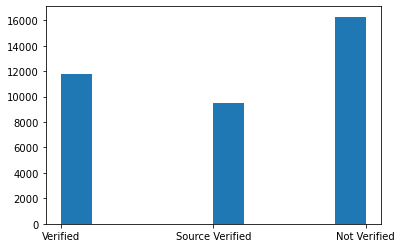

Not Verified       43.35411
Verified           31.35688
Source Verified    25.28901
Name: verification_status, dtype: float64


In [29]:
## UNIVARIATE ANALYSIS for home_ownership
plt.hist(loan_redord_anyls4['verification_status'])
plt.show()
print(loan_redord_anyls4['verification_status'].value_counts()/len(loan_redord_anyls4.index)*100)
## observation:- around 43 % loan given to customer who is not verified

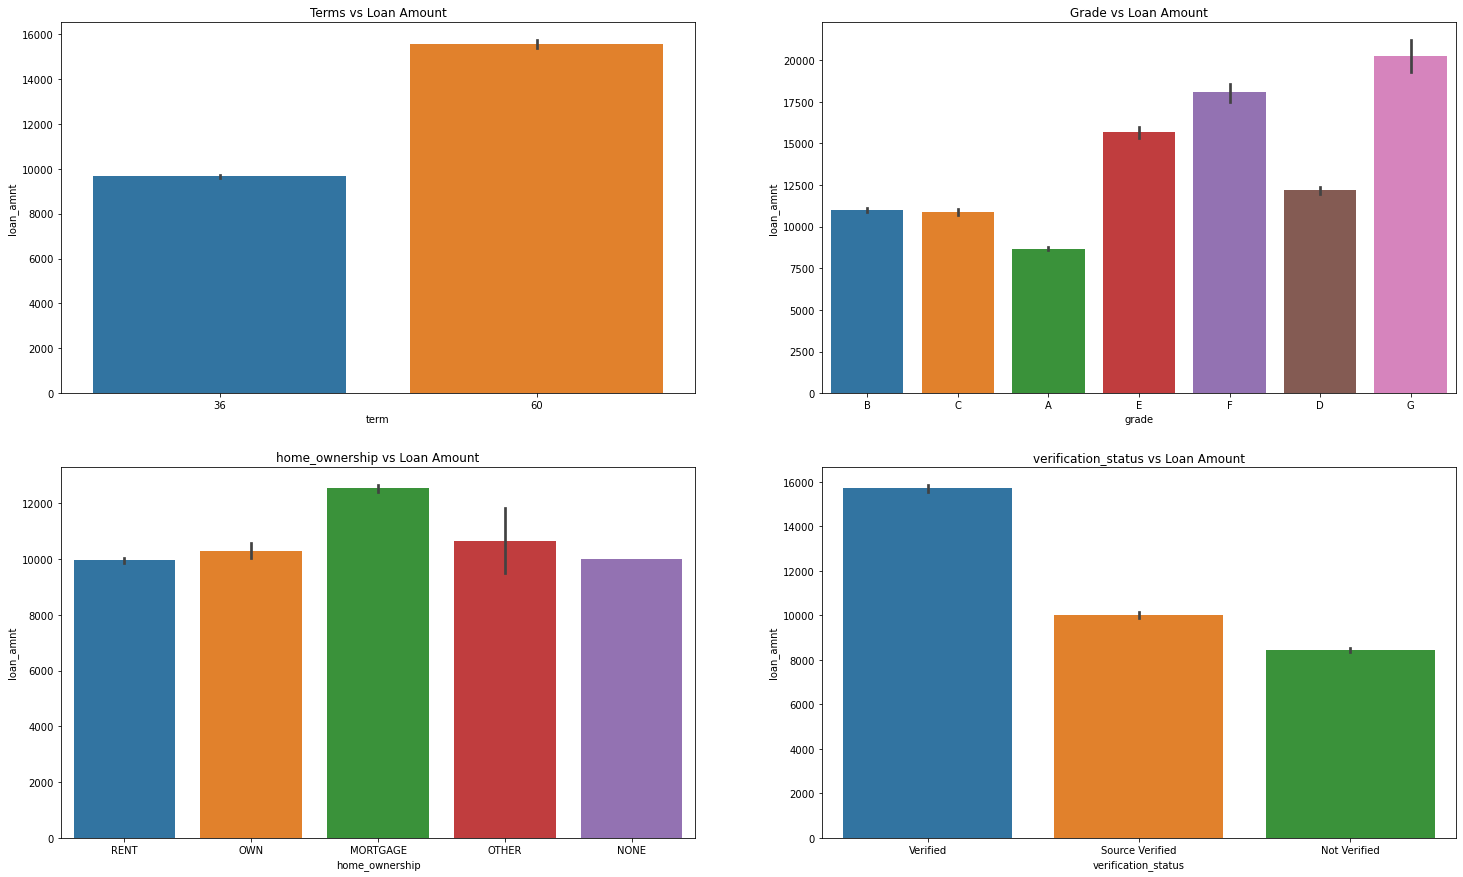

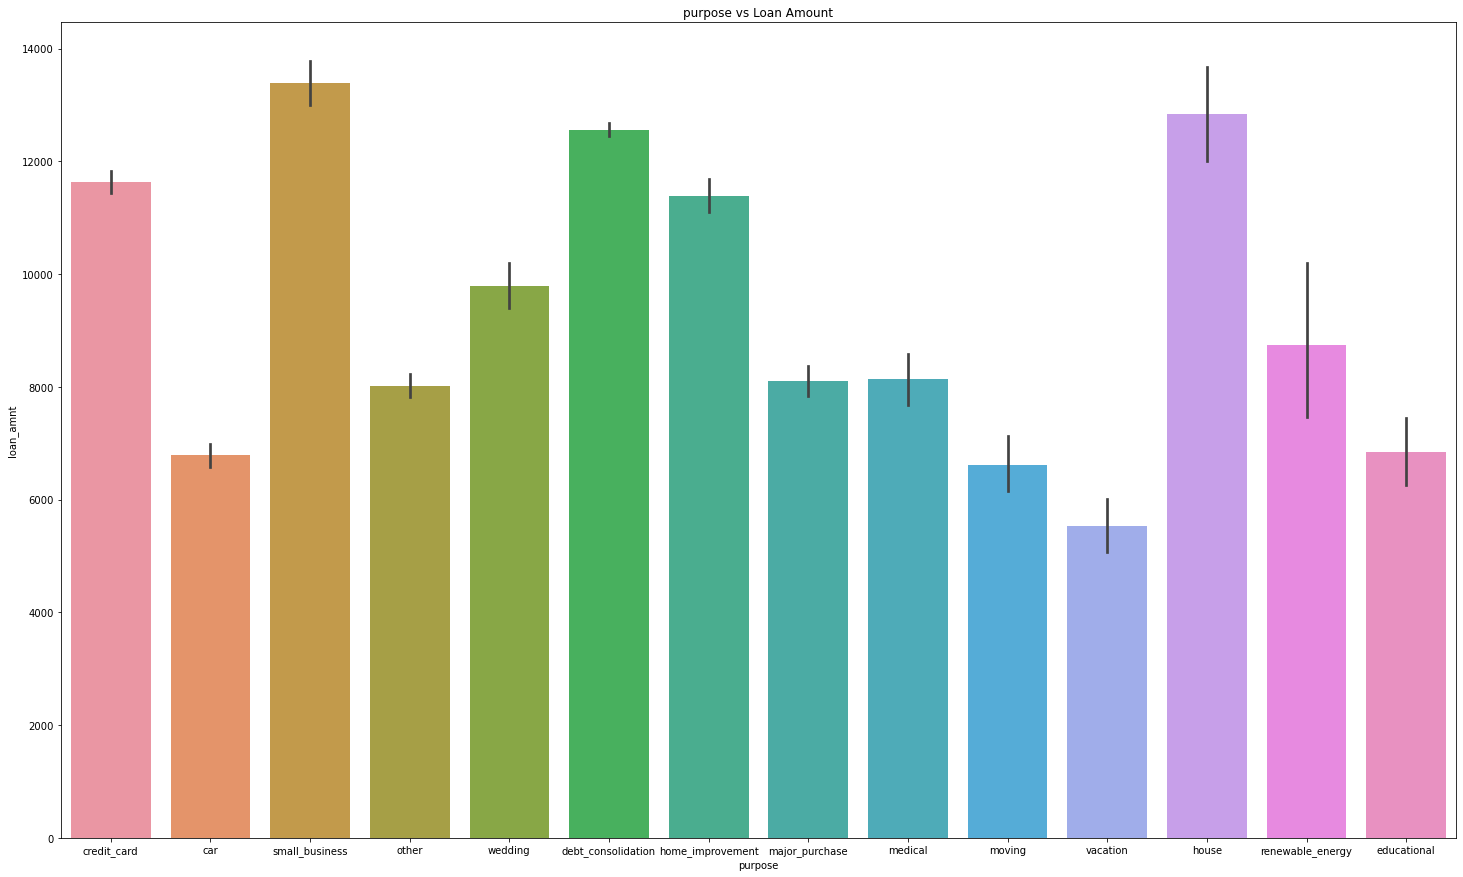

In [56]:
##Segmented univatient analysis

## here will do segmented univariant analyis of Loan amount
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
plt.title('Terms vs Loan Amount')
sns.barplot(x=loan_redord_anyls4.term,y=loan_redord_anyls4.loan_amnt,data=loan_redord_anyls4,estimator=np.mean)
plt.subplot(2,2,2)
plt.title('Grade vs Loan Amount')
sns.barplot(x=loan_redord_anyls4.grade,y=loan_redord_anyls4.loan_amnt,data=loan_redord_anyls4,estimator=np.mean)
plt.subplot(2,2,3)
plt.title('home_ownership vs Loan Amount')
sns.barplot(x=loan_redord_anyls4.home_ownership,y=loan_redord_anyls4.loan_amnt,data=loan_redord_anyls4,estimator=np.mean)
plt.subplot(2,2,4)
plt.title('verification_status vs Loan Amount')
sns.barplot(x=loan_redord_anyls4.verification_status,y=loan_redord_anyls4.loan_amnt,data=loan_redord_anyls4,estimator=np.mean)

plt.figure(figsize=(25,15))
plt.title('purpose vs Loan Amount')
sns.barplot(x=loan_redord_anyls4.purpose,y=loan_redord_anyls4.loan_amnt,data=loan_redord_anyls4,estimator=np.mean)

plt.show()

## Higher amount given for 60 months terms  and for grade G higher amount is taken
## Mortage category taken higher loan amount and verified customer have higher loan amoutn
## higher loan taken for credit card ,house, small business

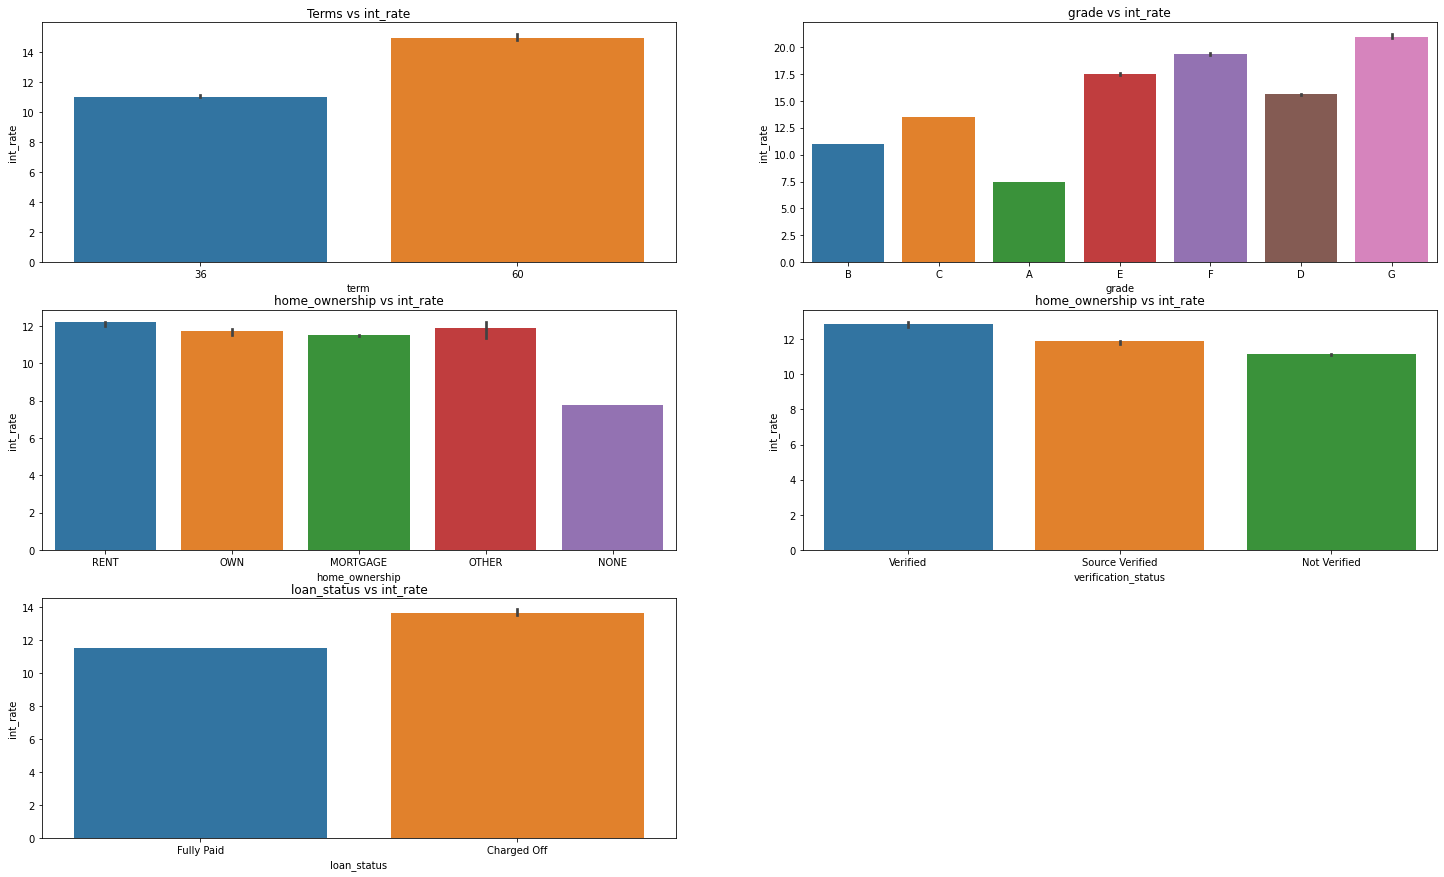

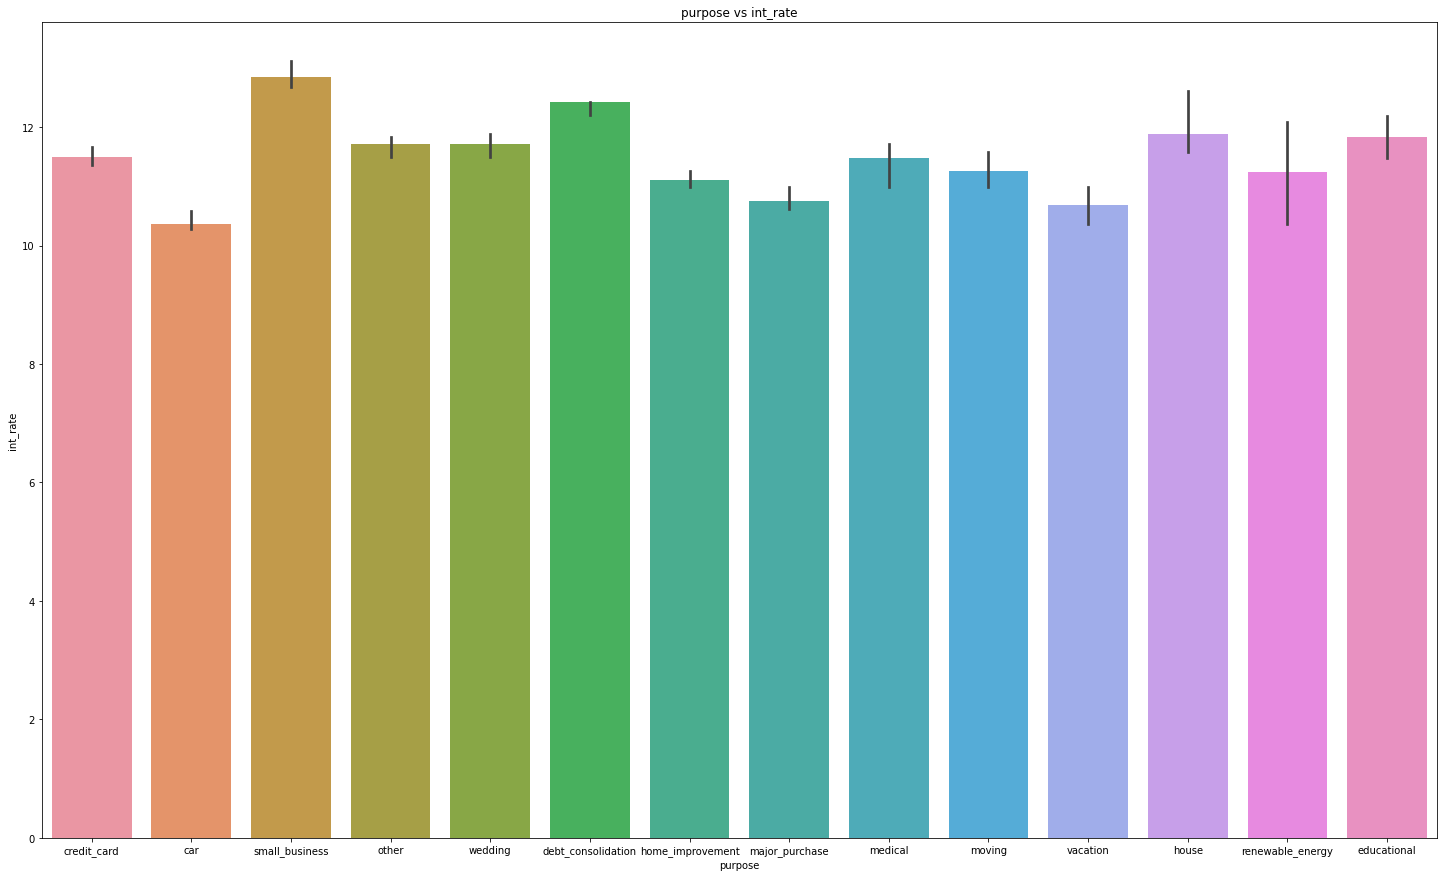

In [67]:
##Segmented univatient analysis

## here will do segmented univariant analyis of int_rate
plt.figure(figsize=(25,15))
plt.subplot(3,2,1)
plt.title('Terms vs int_rate')
sns.barplot(x=loan_redord_anyls4.term,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,2)
plt.title('grade vs int_rate')
sns.barplot(x=loan_redord_anyls4.grade,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,3)
plt.title('home_ownership vs int_rate')
sns.barplot(x=loan_redord_anyls4.home_ownership,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,4)
plt.title('home_ownership vs int_rate')
sns.barplot(x=loan_redord_anyls4.verification_status,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,5)
plt.title('loan_status vs int_rate')
sns.barplot(x=loan_redord_anyls4.loan_status,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.figure(figsize=(25,15))
plt.title('purpose vs int_rate')
sns.barplot(x=loan_redord_anyls4.purpose,y=loan_redord_anyls4.int_rate,data=loan_redord_anyls4,estimator=np.median)

plt.show()



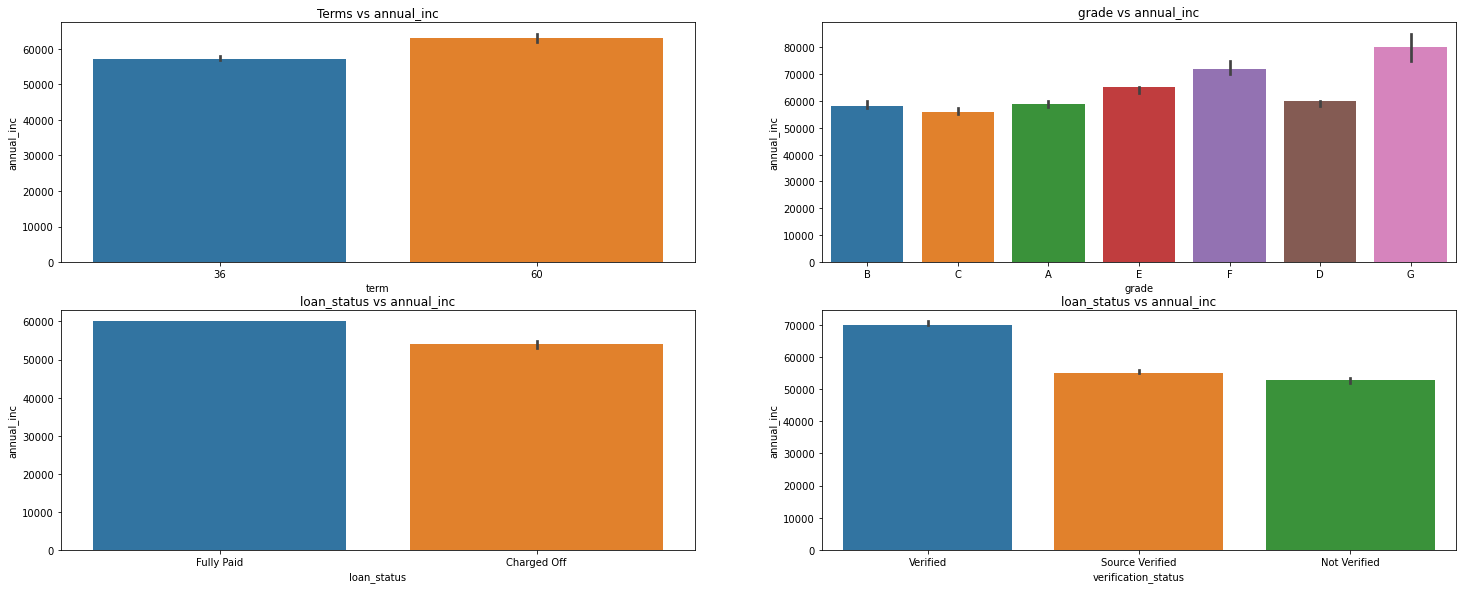

In [72]:
##Segmented univatient analysis

## here will do segmented univariant analyis of annual_inc

plt.figure(figsize=(25,15))
plt.subplot(3,2,1)
plt.title('Terms vs annual_inc')
sns.barplot(x=loan_redord_anyls4.term,y=loan_redord_anyls4.annual_inc,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,2)
plt.title('grade vs annual_inc')
sns.barplot(x=loan_redord_anyls4.grade,y=loan_redord_anyls4.annual_inc,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,3)
plt.title('loan_status vs annual_inc')
sns.barplot(x=loan_redord_anyls4.loan_status,y=loan_redord_anyls4.annual_inc,data=loan_redord_anyls4,estimator=np.median)

plt.subplot(3,2,4)
plt.title('loan_status vs annual_inc')
sns.barplot(x=loan_redord_anyls4.verification_status,y=loan_redord_anyls4.annual_inc,data=loan_redord_anyls4,estimator=np.median)

plt.show()

<AxesSubplot:title={'center':'purpose vs dti'}, xlabel='purpose', ylabel='dti'>

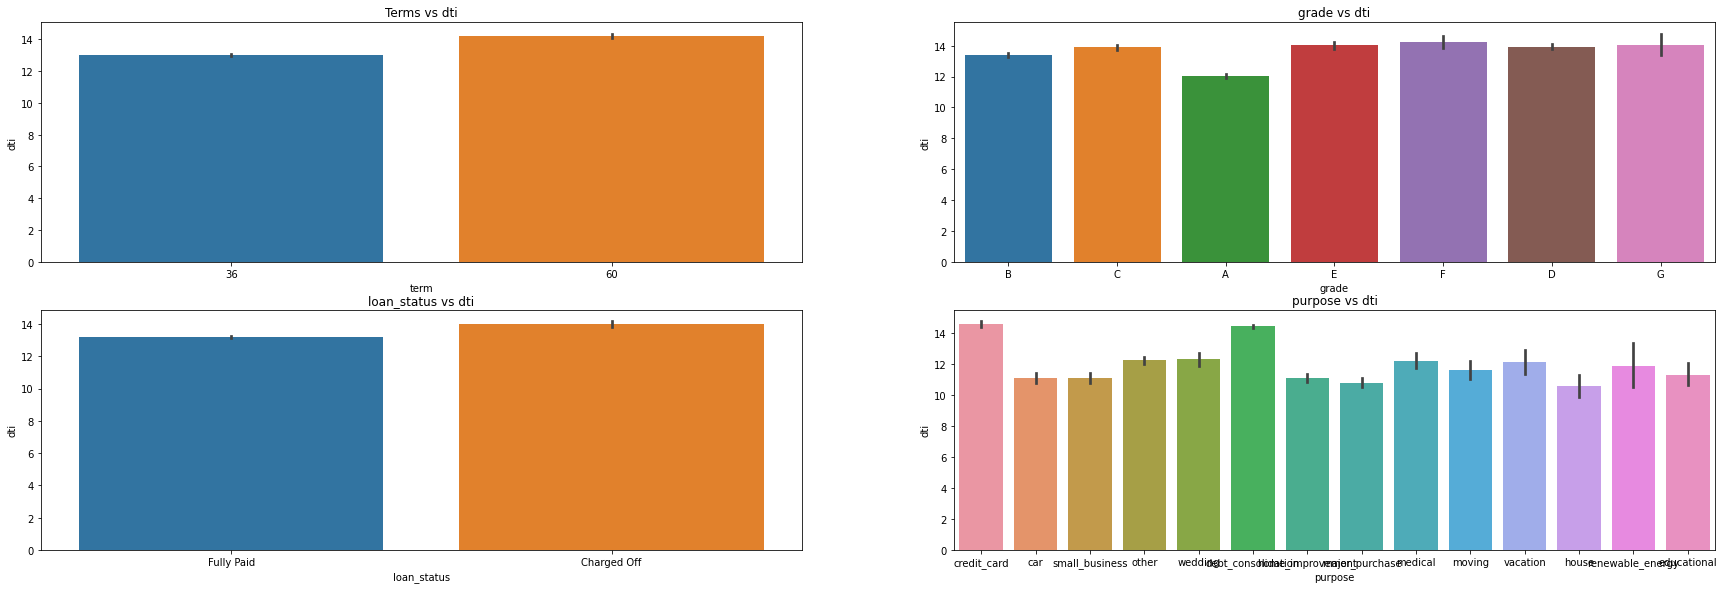

In [80]:
##Segmented univatient analysis
## here will do segmented univariant analyis of dti

plt.figure(figsize=(30,15))
plt.subplot(3,2,1)
plt.title('Terms vs dti')
sns.barplot(x=loan_redord_anyls4.term,y=loan_redord_anyls4.dti,data=loan_redord_anyls4)

plt.subplot(3,2,2)
plt.title('grade vs dti')
sns.barplot(x=loan_redord_anyls4.grade,y=loan_redord_anyls4.dti,data=loan_redord_anyls4)

plt.subplot(3,2,3)
plt.title('loan_status vs dti')
sns.barplot(x=loan_redord_anyls4.loan_status,y=loan_redord_anyls4.dti,data=loan_redord_anyls4)

plt.subplot(3,2,4)
plt.title('purpose vs dti')
sns.barplot(x=loan_redord_anyls4.purpose,y=loan_redord_anyls4.dti,data=loan_redord_anyls4)


<AxesSubplot:title={'center':'loan_status vs pub_rec_bankruptcies'}, xlabel='loan_status', ylabel='pub_rec_bankruptcies'>

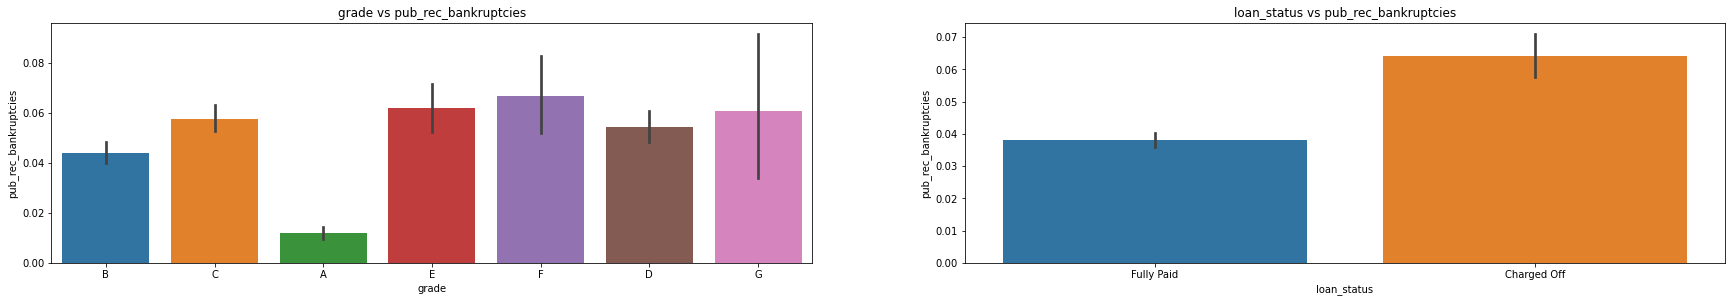

In [82]:
#pub_rec_bankruptcies
plt.figure(figsize=(30,15))
plt.subplot(3,2,1)
plt.title('grade vs pub_rec_bankruptcies')
sns.barplot(x=loan_redord_anyls4.grade,y=loan_redord_anyls4.pub_rec_bankruptcies,data=loan_redord_anyls4)

plt.subplot(3,2,2)
plt.title('loan_status vs pub_rec_bankruptcies')
sns.barplot(x=loan_redord_anyls4.loan_status,y=loan_redord_anyls4.pub_rec_bankruptcies,data=loan_redord_anyls4)


In [ ]:
### Bivariant analysis


In [76]:
## UNIVARIATE ANALYSIS for funded_amnt_inv
loan_redord_anyls4.info()
loan_redord_anyls4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37542 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   37542 non-null  int64  
 1   funded_amnt                 37542 non-null  int64  
 2   funded_amnt_inv             37542 non-null  float64
 3   term                        37542 non-null  int64  
 4   int_rate                    37542 non-null  float64
 5   installment                 37542 non-null  float64
 6   grade                       37542 non-null  object 
 7   sub_grade                   37542 non-null  object 
 8   emp_title                   36136 non-null  object 
 9   emp_length                  37542 non-null  int64  
 10  home_ownership              37542 non-null  object 
 11  annual_inc                  37542 non-null  float64
 12  verification_status         37542 non-null  object 
 13  issue_d                     375

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,issue_d_month,issue_d_year,loan_amnt_bucket,annual_inc_bucket,int_rate_bucket
0,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.7,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,5k-10k,20k-40k,10-15
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,0-5k,20k-40k,15-20
2,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.5,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,0-5k,0-20k,15-20
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,5k-10k,40k-60k,10-15
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,NaN,9,0,7963,28.3,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011,5k-10k,20k-40k,5-10
